The Price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. 

Here we are going to build a prediction model for predicting price of a car.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

from pycaret.regression import *

In [2]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'
car_data = pd.read_csv(url)
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_data.shape

(205, 26)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car_data.select_dtypes('object').describe().transpose()

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [6]:
car_data.select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
enginesize,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0
peakrpm,205.0,5125.121951,476.985643,4150.0,4800.0,5200.0,5500.0,6600.0
citympg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highwaympg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [7]:
brands = car_data['CarName'].apply(lambda x: x.split()[0].lower()) #store value in a variable
car_data.insert(1,'brand',brands)

In [8]:
car_data['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There can be observed a few car names are repeated with the wrong spelling. Now they have to be renamed.

In [9]:
car_data["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [10]:
cor_names = {"maxda":"mazda","porcshce": "porsche","toyouta":"toyota", "vokswagen":"volkswagen","vw":"volkswagen"}
car_data['brand'] = car_data['brand'].replace(cor_names)
print(car_data['brand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [11]:
car_data.query('brand =="alfa-romero"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [12]:
car_data.query('brand =="audi"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,4,audi,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.000
4,5,audi,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.000
5,6,audi,2,audi fox,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250.000
6,7,audi,1,audi 100ls,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710.000
7,8,audi,1,audi 5000,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920.000
8,9,audi,1,audi 4000,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875.000
9,10,audi,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,17859.167


In [13]:
car_data.query('brand =="bmw"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
10,11,bmw,2,bmw 320i,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0
11,12,bmw,0,bmw 320i,gas,std,four,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0
12,13,bmw,0,bmw x1,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0
13,14,bmw,0,bmw x3,gas,std,four,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0
14,15,bmw,1,bmw z4,gas,std,four,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
15,16,bmw,0,bmw x4,gas,std,four,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,bmw,0,bmw x5,gas,std,two,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,bmw,0,bmw x3,gas,std,four,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [14]:
car_data.query('brand =="chevrolet"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,chevrolet,2,chevrolet impala,gas,std,two,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
19,20,chevrolet,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0
20,21,chevrolet,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0


In [15]:
car_data.query('brand =="dodge"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
21,22,dodge,1,dodge rampage,gas,std,two,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0
22,23,dodge,1,dodge challenger se,gas,std,two,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377.0
23,24,dodge,1,dodge d200,gas,turbo,two,hatchback,fwd,front,...,98,mpfi,3.03,3.39,7.60,102,5500,24,30,7957.0
24,25,dodge,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229.0
25,26,dodge,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692.0
26,27,dodge,1,dodge colt (sw),gas,std,four,sedan,fwd,front,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,7609.0
27,28,dodge,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,...,98,mpfi,3.03,3.39,7.60,102,5500,24,30,8558.0
28,29,dodge,-1,dodge dart custom,gas,std,four,wagon,fwd,front,...,122,2bbl,3.34,3.46,8.50,88,5000,24,30,8921.0
29,30,dodge,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,...,156,mfi,3.60,3.90,7.00,145,5000,19,24,12964.0


In [16]:
car_data.query('brand =="honda"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
30,31,honda,2,honda civic,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0
31,32,honda,2,honda civic cvcc,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855.0
32,33,honda,1,honda civic,gas,std,two,hatchback,fwd,front,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399.0
33,34,honda,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0
34,35,honda,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
35,36,honda,0,honda accord lx,gas,std,four,sedan,fwd,front,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295.0
36,37,honda,0,honda civic 1500 gl,gas,std,four,wagon,fwd,front,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295.0
37,38,honda,0,honda accord,gas,std,two,hatchback,fwd,front,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0
38,39,honda,0,honda civic 1300,gas,std,two,hatchback,fwd,front,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
39,40,honda,0,honda prelude,gas,std,four,sedan,fwd,front,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0


In [17]:
car_data.query('brand =="isuzu"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
43,44,isuzu,0,isuzu MU-X,gas,std,four,sedan,rwd,front,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785.0
44,45,isuzu,1,isuzu D-Max,gas,std,two,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
45,46,isuzu,0,isuzu D-Max V-Cross,gas,std,four,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
46,47,isuzu,2,isuzu D-Max,gas,std,two,hatchback,rwd,front,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


In [18]:
car_data.query('brand =="jaguar"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
47,48,jaguar,0,jaguar xj,gas,std,four,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,jaguar,0,jaguar xf,gas,std,four,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,jaguar,0,jaguar xk,gas,std,two,sedan,rwd,front,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


In [19]:
car_data.query('brand =="mazda"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
50,51,mazda,1,maxda rx3,gas,std,two,hatchback,fwd,front,...,91,2bbl,3.03,3.150,9.0,68,5000,30,31,5195.0
51,52,mazda,1,maxda glc deluxe,gas,std,two,hatchback,fwd,front,...,91,2bbl,3.03,3.150,9.0,68,5000,31,38,6095.0
52,53,mazda,1,mazda rx2 coupe,gas,std,two,hatchback,fwd,front,...,91,2bbl,3.03,3.150,9.0,68,5000,31,38,6795.0
53,54,mazda,1,mazda rx-4,gas,std,four,sedan,fwd,front,...,91,2bbl,3.03,3.150,9.0,68,5000,31,38,6695.0
54,55,mazda,1,mazda glc deluxe,gas,std,four,sedan,fwd,front,...,91,2bbl,3.08,3.150,9.0,68,5000,31,38,7395.0
55,56,mazda,3,mazda 626,gas,std,two,hatchback,rwd,front,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
56,57,mazda,3,mazda glc,gas,std,two,hatchback,rwd,front,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
57,58,mazda,3,mazda rx-7 gs,gas,std,two,hatchback,rwd,front,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
58,59,mazda,3,mazda glc 4,gas,std,two,hatchback,rwd,front,...,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0
59,60,mazda,1,mazda 626,gas,std,two,hatchback,fwd,front,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,8845.0


In [20]:
car_data.query('brand =="buick"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
67,68,buick,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,69,buick,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,70,buick,0,buick century,diesel,turbo,two,hardtop,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
70,71,buick,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,buick,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,buick,3,buick skylark,gas,std,two,convertible,rwd,front,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,buick,0,buick century special,gas,std,four,sedan,rwd,front,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,buick,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [21]:
car_data.query('brand =="mercury"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,mercury,1,mercury cougar,gas,turbo,two,hatchback,rwd,front,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [22]:
car_data.query('brand =="mitsubishi"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
76,77,mitsubishi,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0
77,78,mitsubishi,2,mitsubishi lancer,gas,std,two,hatchback,fwd,front,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189.0
78,79,mitsubishi,2,mitsubishi outlander,gas,std,two,hatchback,fwd,front,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669.0
79,80,mitsubishi,1,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689.0
80,81,mitsubishi,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959.0
81,82,mitsubishi,3,mitsubishi g4,gas,std,two,hatchback,fwd,front,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
82,83,mitsubishi,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
83,84,mitsubishi,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.0
84,85,mitsubishi,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0
85,86,mitsubishi,1,mitsubishi montero,gas,std,four,sedan,fwd,front,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989.0


In [23]:
car_data.query('brand =="nissan"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,90,nissan,1,Nissan versa,gas,std,two,sedan,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0
90,91,nissan,1,nissan gt-r,diesel,std,two,sedan,fwd,front,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
91,92,nissan,1,nissan rogue,gas,std,two,sedan,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649.0
92,93,nissan,1,nissan latio,gas,std,four,sedan,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849.0
93,94,nissan,1,nissan titan,gas,std,four,wagon,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7349.0
94,95,nissan,1,nissan leaf,gas,std,two,sedan,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299.0
95,96,nissan,1,nissan juke,gas,std,two,hatchback,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799.0
96,97,nissan,1,nissan latio,gas,std,four,sedan,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
97,98,nissan,1,nissan note,gas,std,four,wagon,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
98,99,nissan,2,nissan clipper,gas,std,two,hardtop,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249.0


In [24]:
car_data.query('brand =="peugeot"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
107,108,peugeot,0,peugeot 504,gas,std,four,sedan,rwd,front,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900.0
108,109,peugeot,0,peugeot 304,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
109,110,peugeot,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
110,111,peugeot,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0
111,112,peugeot,0,peugeot 504,gas,std,four,sedan,rwd,front,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
112,113,peugeot,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0
113,114,peugeot,0,peugeot 504,gas,std,four,wagon,rwd,front,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
114,115,peugeot,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,25,25,17075.0
115,116,peugeot,0,peugeot 504,gas,std,four,sedan,rwd,front,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0
116,117,peugeot,0,peugeot 504,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,28,33,17950.0


In [25]:
car_data.query('brand =="plymouth"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
118,119,plymouth,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,37,41,5572.0
119,120,plymouth,1,plymouth cricket,gas,turbo,two,hatchback,fwd,front,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957.0
120,121,plymouth,1,plymouth fury iii,gas,std,four,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
121,122,plymouth,1,plymouth satellite custom (sw),gas,std,four,sedan,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
122,123,plymouth,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,...,98,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
123,124,plymouth,-1,plymouth valiant,gas,std,four,wagon,fwd,front,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0
124,125,plymouth,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0


In [26]:
car_data.query('brand =="porsche"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
125,126,porsche,3,porsche macan,gas,std,two,hatchback,rwd,front,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0
126,127,porsche,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0
127,128,porsche,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0
128,129,porsche,3,porsche boxter,gas,std,two,convertible,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
129,130,porsche,1,porsche cayenne,gas,std,two,hatchback,rwd,front,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [27]:
car_data.query('brand =="renault"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,renault,0,renault 12tl,gas,std,four,wagon,fwd,front,...,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,renault,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,...,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


In [28]:
car_data.query('brand =="saab"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
132,133,saab,3,saab 99e,gas,std,two,hatchback,fwd,front,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
133,134,saab,2,saab 99le,gas,std,four,sedan,fwd,front,...,121,mpfi,3.54,3.07,9.30,110,5250,21,28,12170.0
134,135,saab,3,saab 99le,gas,std,two,hatchback,fwd,front,...,121,mpfi,2.54,2.07,9.30,110,5250,21,28,15040.0
135,136,saab,2,saab 99gle,gas,std,four,sedan,fwd,front,...,121,mpfi,3.54,3.07,9.30,110,5250,21,28,15510.0
136,137,saab,3,saab 99gle,gas,turbo,two,hatchback,fwd,front,...,121,mpfi,3.54,3.07,9.00,160,5500,19,26,18150.0
137,138,saab,2,saab 99e,gas,turbo,four,sedan,fwd,front,...,121,mpfi,3.54,3.07,9.00,160,5500,19,26,18620.0


In [29]:
car_data.query('brand =="subaru"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,139,subaru,2,subaru,gas,std,two,hatchback,fwd,front,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
139,140,subaru,2,subaru dl,gas,std,two,hatchback,fwd,front,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0
140,141,subaru,2,subaru dl,gas,std,two,hatchback,4wd,front,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0
141,142,subaru,0,subaru,gas,std,four,sedan,fwd,front,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0
142,143,subaru,0,subaru brz,gas,std,four,sedan,fwd,front,...,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775.0
143,144,subaru,0,subaru baja,gas,std,four,sedan,fwd,front,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.0
144,145,subaru,0,subaru r1,gas,std,four,sedan,4wd,front,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233.0
145,146,subaru,0,subaru r2,gas,turbo,four,sedan,4wd,front,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259.0
146,147,subaru,0,subaru trezia,gas,std,four,wagon,fwd,front,...,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0
147,148,subaru,0,subaru tribeca,gas,std,four,wagon,fwd,front,...,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198.0


In [30]:
brands = car_data['CarName'].apply(
    lambda x: x.split()) 
for brand in brands:
    if len(brand) ==1:
        print(brand)
#We have two outliers - Index 138 and 141        
car_data.query('brand =="subaru" & index in [138,141]') 

#Remove outliers per index
car_data.drop(index = [138,141], axis=0, inplace=True)

['subaru']
['subaru']


In [31]:
car_data.query('brand =="toyota"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
150,151,toyota,1,toyota corona mark ii,gas,std,two,hatchback,fwd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0
151,152,toyota,1,toyota corona,gas,std,two,hatchback,fwd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
152,153,toyota,1,toyota corolla 1200,gas,std,four,hatchback,fwd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
153,154,toyota,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
154,155,toyota,0,toyota corolla 1600 (sw),gas,std,four,wagon,4wd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0
155,156,toyota,0,toyota carina,gas,std,four,wagon,4wd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0
156,157,toyota,0,toyota mark ii,gas,std,four,sedan,fwd,front,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
157,158,toyota,0,toyota corolla 1200,gas,std,four,hatchback,fwd,front,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0
158,159,toyota,0,toyota corona,diesel,std,four,sedan,fwd,front,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
159,160,toyota,0,toyota corolla,diesel,std,four,hatchback,fwd,front,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0


In [32]:
car_data.query('brand =="volkswagen"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
182,183,volkswagen,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775.0
183,184,volkswagen,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,...,109,mpfi,3.19,3.4,9.0,85,5250,27,34,7975.0
184,185,volkswagen,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7995.0
185,186,volkswagen,2,volkswagen type 3,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,9.0,85,5250,27,34,8195.0
186,187,volkswagen,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,9.0,85,5250,27,34,8495.0
187,188,volkswagen,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,...,97,idi,3.01,3.4,23.0,68,4500,37,42,9495.0
188,189,volkswagen,2,volkswagen dasher,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,10.0,100,5500,26,32,9995.0
189,190,volkswagen,3,vw dasher,gas,std,two,convertible,fwd,front,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595.0
190,191,volkswagen,3,vw rabbit,gas,std,two,hatchback,fwd,front,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,9980.0
191,192,volkswagen,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.4,8.5,110,5500,19,24,13295.0


In [33]:
car_data.query('brand =="volvo"') 

,car_ID,brand,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
194,195,volvo,-2,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
195,196,volvo,-1,volvo 144ea,gas,std,four,wagon,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,volvo,-2,volvo 244dl,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,volvo,-1,volvo 245,gas,std,four,wagon,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,volvo,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,volvo,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,volvo,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Now that every brand of car has been analyzed and resolved of duplicate values, we separate the names from the models.

In [34]:
carname = car_data['CarName'].apply(lambda x: x.split()[1].lower()) 
car_data.insert(2,'carname',carname) 
car_data.pop('CarName') 
car_data.head(20)

,car_ID,brand,carname,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,alfa-romero,quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,audi,100,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,audi,fox,2,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,audi,100ls,1,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,audi,5000,1,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,audi,4000,1,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,audi,5000s,0,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [35]:
# Finding distinct categorical values for every attribute.

for dv in car_data.columns:
    if car_data[dv].nunique() <= 10:
        print(f'{dv} - {car_data[dv].nunique()} - {car_data[dv].unique()}') 
    else:
        print(f'{dv} - {car_data[dv].nunique()}')

car_ID - 203
brand - 22
carname - 114
symboling - 6 - [ 3  1  2  0 -1 -2]
fueltype - 2 - ['gas' 'diesel']
aspiration - 2 - ['std' 'turbo']
doornumber - 2 - ['two' 'four']
carbody - 5 - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel - 3 - ['rwd' 'fwd' '4wd']
enginelocation - 2 - ['front' 'rear']
wheelbase - 53
carlength - 74
carwidth - 43
carheight - 49
curbweight - 170
enginetype - 7 - ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber - 7 - ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
enginesize - 44
fuelsystem - 8 - ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
boreratio - 38
stroke - 36
compressionratio - 32
horsepower - 59
peakrpm - 22
citympg - 28
highwaympg - 30
price - 187


In [36]:
# Replacing categorical data into numerical data for further analysis
# Converting the attribute "cylindernumber" form categorical to numerical

print(car_data['cylindernumber'].unique())
rename = {"four":4,"six":6,"five":5,"three":3,"twelve":12,"two":2,"eight":8}
car_data['cylindernumber'] = car_data['cylindernumber'].replace(rename)
print(car_data['cylindernumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
[ 4  6  5  3 12  2  8]


In [37]:
# Conveting the attribute "doornumber" from categorical to numerical

print(car_data['doornumber'].unique())
car_data['doornumber'] = car_data['doornumber'].replace(rename)
print(car_data['doornumber'].unique())

['two' 'four']
[2 4]


In [38]:
car_data.isnull().sum()

car_ID              0
brand               0
carname             0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [39]:
car_data.duplicated().sum()

0

In [40]:
car_data.dtypes

car_ID                int64
brand                object
carname              object
symboling             int64
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [41]:
for col in car_data.columns:
    if car_data[col].dtype == 'object':
        car_data[col] = car_data[col].astype('string')

In [42]:
car_data.dtypes

car_ID                int64
brand                string
carname              string
symboling             int64
fueltype             string
aspiration           string
doornumber            int64
carbody              string
drivewheel           string
enginelocation       string
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           string
cylindernumber        int64
enginesize            int64
fuelsystem           string
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [43]:
car_data.head()

,car_ID,brand,carname,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,quadrifoglio,1,gas,std,2,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100,2,gas,std,4,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data handling

In [44]:
car_data.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.630542,0.832512,3.123153,98.789163,174.143842,65.922660,53.731034,2560.078818,4.384236,127.147783,3.326897,3.262857,10.15133,104.399015,5127.832512,25.157635,30.694581,13347.200330
std,59.497287,1.247384,0.994841,6.039964,12.338152,2.148216,2.454068,521.221484,1.085525,41.773527,0.270629,0.305642,3.99058,39.631013,478.525201,6.544197,6.896356,7995.739861
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.00000,48.000000,4150.000000,13.000000,16.000000,5151.000000
25%,51.500000,0.000000,2.000000,94.500000,166.550000,64.100000,52.000000,2179.500000,4.000000,97.500000,3.150000,3.110000,8.55000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,102.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,4.000000,120.000000,3.310000,3.290000,9.00000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,154.500000,2.000000,4.000000,102.400000,183.300000,66.900000,55.500000,2943.500000,4.000000,143.000000,3.580000,3.410000,9.40000,116.000000,5500.000000,30.000000,34.000000,16509.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.00000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot: title={'center': 'compressionratio'}>

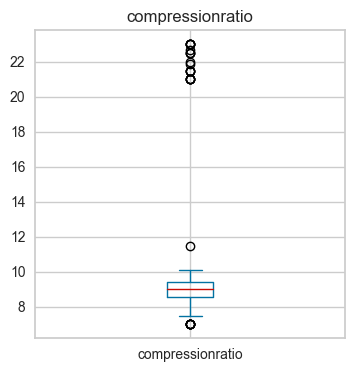

In [45]:
car_data['compressionratio'].plot(kind='box',title = 'compressionratio', figsize = (4,4))

In [46]:
car_data.query('compressionratio > 20')

,car_ID,brand,carname,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
63,64,mazda,glc,0,diesel,std,4,sedan,fwd,front,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
66,67,mazda,rx-7,0,diesel,std,4,sedan,rwd,front,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
67,68,buick,electra,-1,diesel,turbo,4,sedan,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,69,buick,century,-1,diesel,turbo,4,wagon,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,70,buick,century,0,diesel,turbo,2,hardtop,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
70,71,buick,skyhawk,-1,diesel,turbo,4,sedan,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
90,91,nissan,gt-r,1,diesel,std,2,sedan,fwd,front,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
108,109,peugeot,304,0,diesel,turbo,4,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
110,111,peugeot,504,0,diesel,turbo,4,wagon,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0
112,113,peugeot,604sl,0,diesel,turbo,4,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0


It appears to be fine that a diesel engine's compresse ratio ranges from 14:1 to 25:1, whereas a gasoline engine's compresse ratio was discovered to be between 8:1 and 12:1.

<AxesSubplot: title={'center': 'price'}>

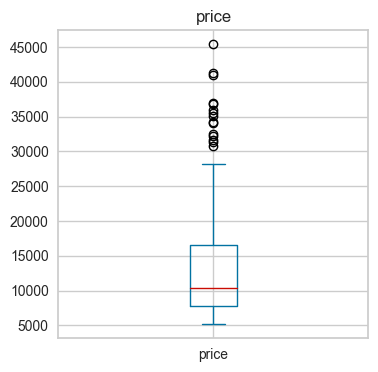

In [47]:
car_data['price'].plot(kind='box',title = 'price', figsize = (4,4))

In [48]:
car_data.query('price > 28000')

,car_ID,brand,carname,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,bmw,x4,0,gas,std,4,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,bmw,x5,0,gas,std,2,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,bmw,x3,0,gas,std,4,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,jaguar,xj,0,gas,std,4,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,jaguar,xf,0,gas,std,4,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,jaguar,xk,0,gas,std,2,sedan,rwd,front,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
68,69,buick,century,-1,diesel,turbo,4,wagon,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,70,buick,century,0,diesel,turbo,2,hardtop,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
70,71,buick,skyhawk,-1,diesel,turbo,4,sedan,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,buick,opel,-1,gas,std,4,sedan,rwd,front,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0


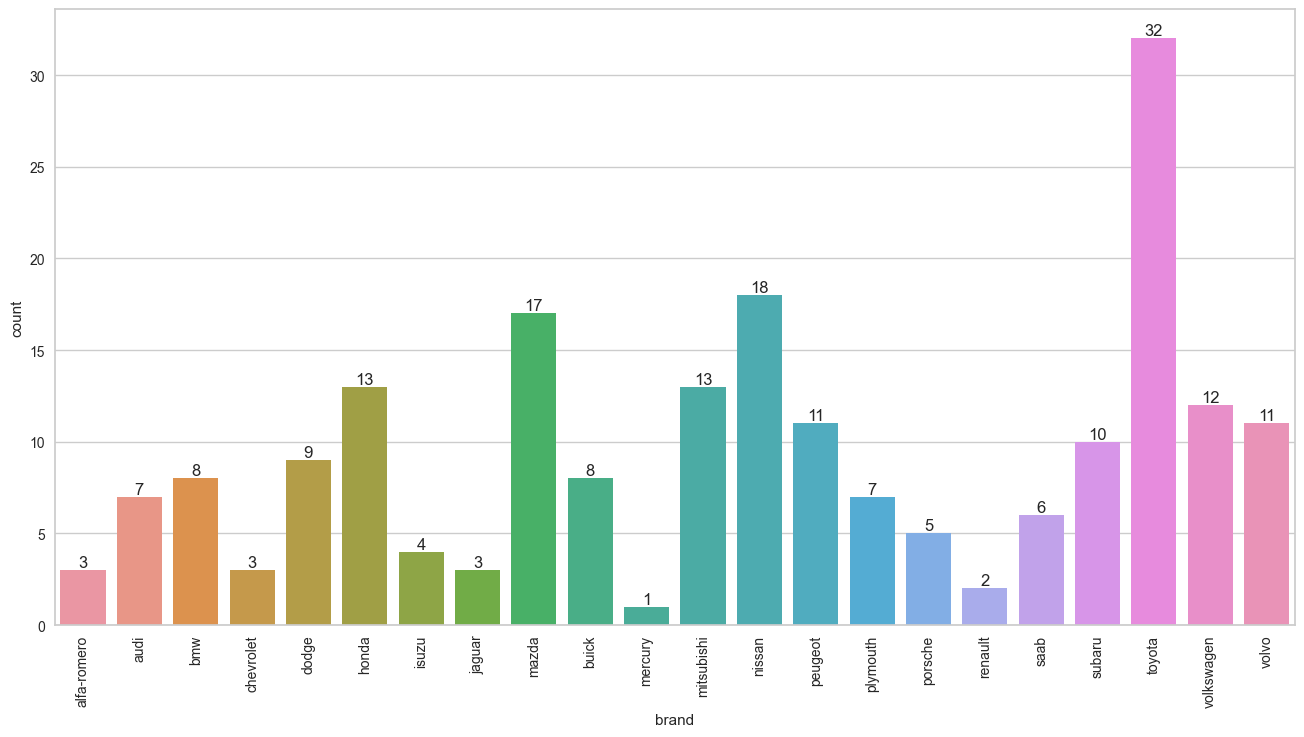

In [49]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x=car_data["brand"]);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

The above chart represents the number of cars sold with respect to the brand.

It was observed that the brand "Toyota" has the highest number of sales of their cars with 32 cars and the second highest brand to sell most number of cars aftr Toyota is "Nissan" with 18 cars followed by "Mazda" with 17 cars. It was also noticed that "Honda" and "Mitsuhishi" had the same amount of cars sold with the count of 13 each which are closely followed by "Volkswagen", "Volvo" and "Subaru" with 12, 11, and 10 cars respectively. 

Rest of the brands have sold thier cars with an average of 7 cars per brand.

"Alfa-Romero", Chevrolet", and "Jaguar" have sold 3 cars each followed by "Renault" with only 2 cars and the "Mercury" selling only 1 car, are the brands with least number of sales of their cars.

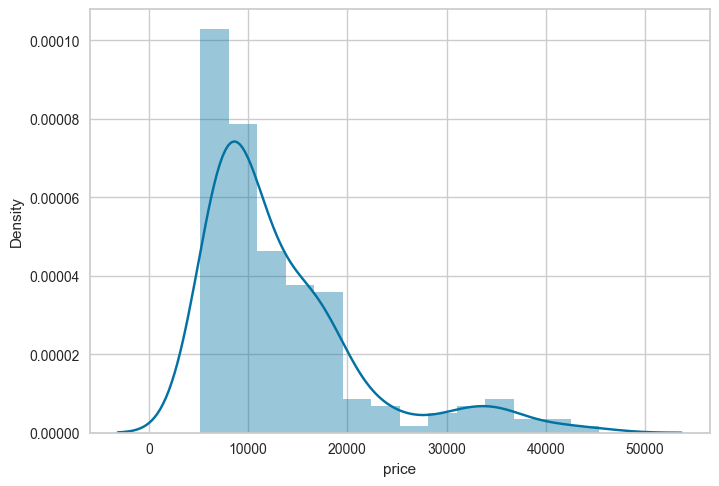

In [50]:
# Car Price Distribution

sns.distplot(car_data["price"], hist=True);

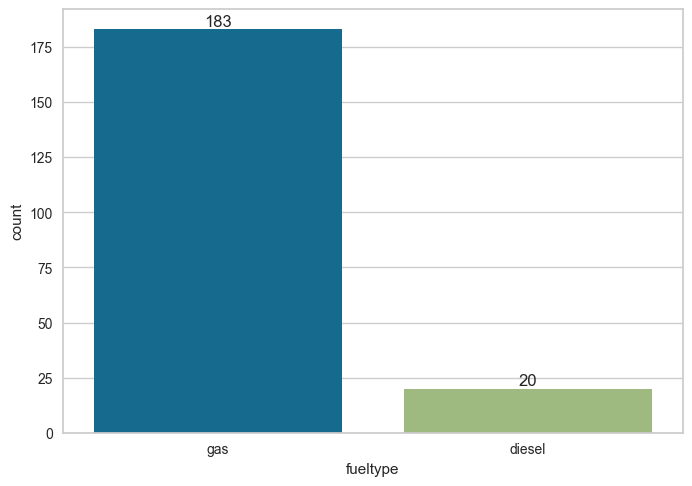

In [51]:
# what fuel is used
ax=sns.countplot(x=car_data["fueltype"]);
ax.bar_label(ax.containers[0]);

The chart depicts the number of cars which are sold with respect to the fuel used by the engine. 

There are observed two types of fuels which the engine uses, those fuels are 'Gas'(Petrol) and 'Diesel'. The car which consumes "Gas"(petrol) has the highest number of sales with 183 cars, and the cars which use "Diesel" as fuel are sold minimum with the count of 83 cars.

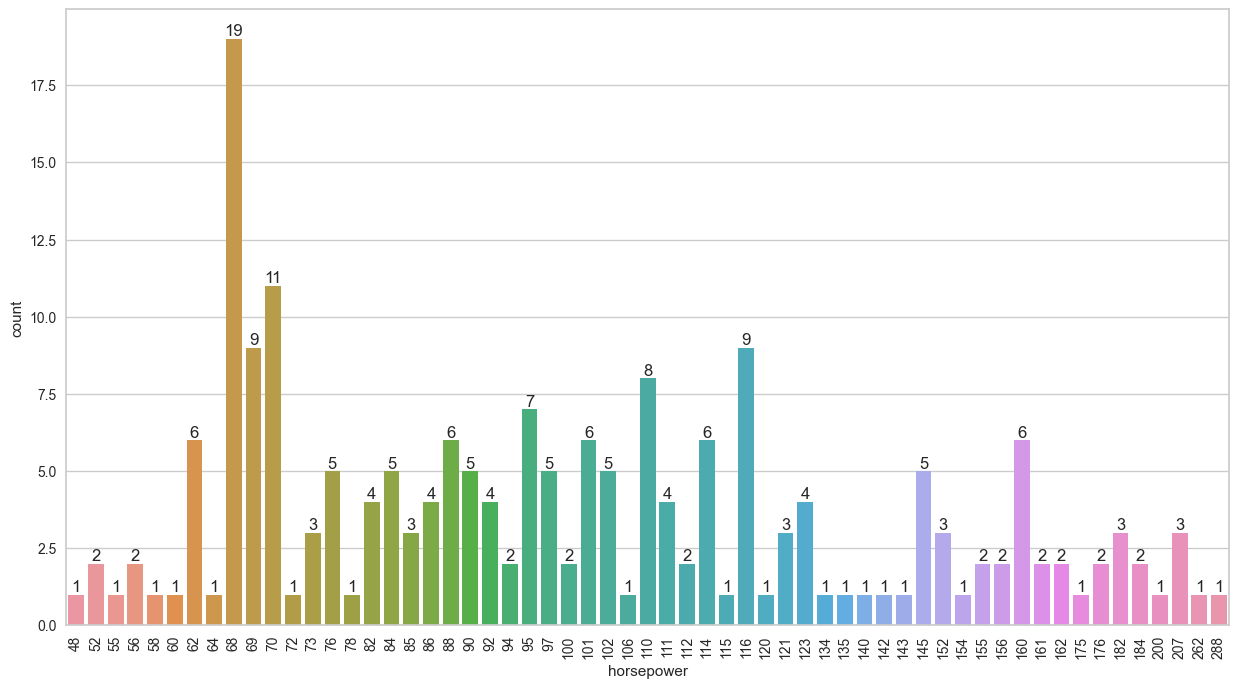

In [52]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x=car_data["horsepower"]);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

In [53]:
df_corr = car_data.corr()
fil_corr = df_corr[(abs(df_corr)>0.5) & (df_corr != 1)]

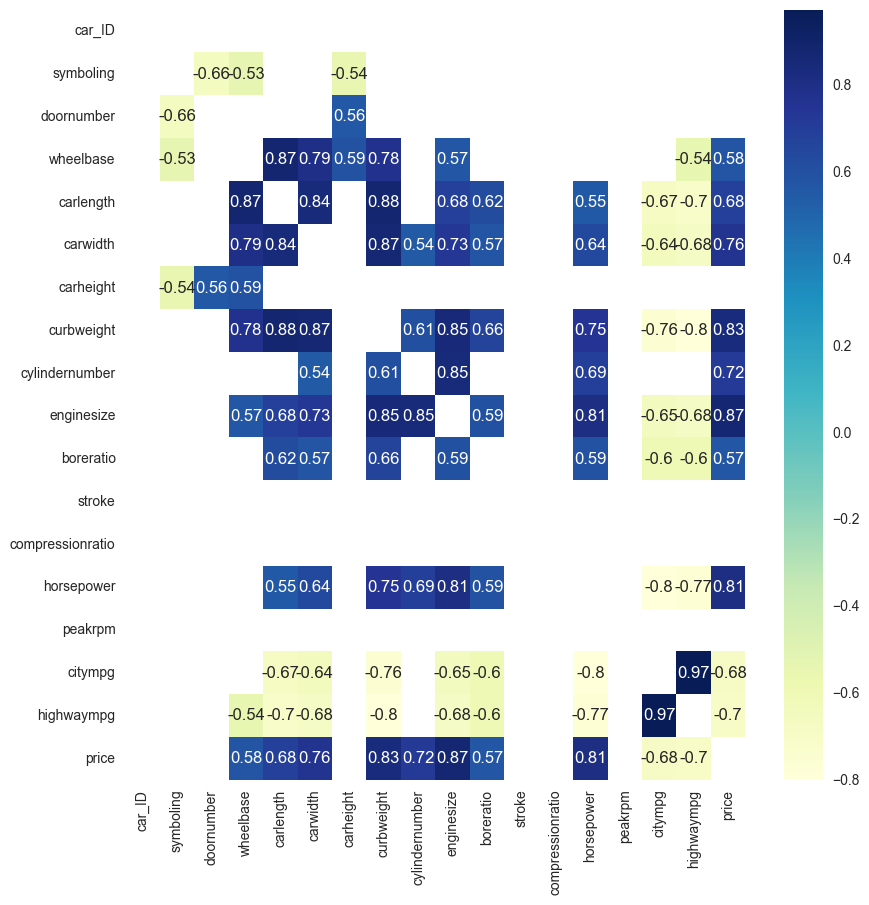

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(fil_corr,annot = True, cmap = 'YlGnBu')
plt.show()

High collinearity between predictor variables can be observed in the above graph. A section of it can be eliminated later. (or use regularization to mitigate the effect)

In [55]:
# Doing One hot encoding on the data given 

str_column = [column for column in car_data.columns if car_data[column].dtype == 'string'] 
encode_std = pd.get_dummies(car_data,columns = str_column)

In [56]:
scaler = StandardScaler()

car_df_encoded_std = pd.DataFrame(scaler.fit_transform(encode_std),columns = encode_std.columns)
car_df_encoded_std.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,203.000000,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,...,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,203.000000,2.030000e+02,2.030000e+02
mean,0.000000,-8.750526e-18,1.050063e-16,-1.076315e-15,2.310139e-15,4.812789e-15,-3.972739e-15,2.100126e-16,-1.400084e-16,-9.406816e-17,...,3.609592e-17,2.625158e-17,3.500211e-17,-1.225074e-16,-2.625158e-17,3.500211e-17,4.375263e-18,0.000000,-2.625158e-17,-2.187632e-17
std,1.002472,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,...,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472e+00,1.002472,1.002472e+00,1.002472e+00
min,-1.712377,-2.276375e+00,-1.131768e+00,-2.023074e+00,-2.684805e+00,-2.623834e+00,-2.422793e+00,-2.061943e+00,-2.201820e+00,-1.587400e+00,...,-2.615742e-01,-1.417762e-01,-2.393568e-01,-6.785511e-01,-1.224745e-01,-3.305898e-01,-7.035975e-02,-0.928647,-2.153874e-01,-7.035975e-02
25%,-0.861501,-6.690564e-01,-1.131768e+00,-7.118860e-01,-6.169980e-01,-8.505506e-01,-7.071174e-01,-7.319723e-01,-3.548388e-01,-7.114812e-01,...,-2.615742e-01,-1.417762e-01,-2.393568e-01,-6.785511e-01,-1.224745e-01,-3.305898e-01,-7.035975e-02,-0.928647,-2.153874e-01,-7.035975e-02
50%,-0.010624,1.346031e-01,8.835733e-01,-2.969530e-01,-7.668699e-02,-1.972358e-01,1.507202e-01,-2.694154e-01,-3.548388e-01,-1.715310e-01,...,-2.615742e-01,-1.417762e-01,-2.393568e-01,-6.785511e-01,-1.224745e-01,-3.305898e-01,-7.035975e-02,-0.928647,-2.153874e-01,-7.035975e-02
75%,0.873951,9.382626e-01,8.835733e-01,5.993022e-01,7.439358e-01,4.560790e-01,7.226120e-01,7.374390e-01,-3.548388e-01,3.804181e-01,...,-2.615742e-01,-1.417762e-01,-2.393568e-01,1.473728e+00,-1.224745e-01,-3.305898e-01,-7.035975e-02,1.076835,-2.153874e-01,-7.035975e-02
max,1.724827,1.741922e+00,8.835733e-01,3.669806e+00,2.758930e+00,2.976007e+00,2.479137e+00,2.896358e+00,7.033088e+00,4.772013e+00,...,3.823007e+00,7.053368e+00,4.177864e+00,1.473728e+00,8.164966e+00,3.024897e+00,1.421267e+01,1.076835,4.642796e+00,1.421267e+01


# Training data

In [57]:
X = np.array(encode_std.loc[:, encode_std.columns != 'price'].values)
y = np.array(encode_std['price'].values)

In [58]:
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print("Train Score")
print(lin_reg.score(X_train,y_train))
print('Test Score')
print(lin_reg.score(X_test,y_test))

Train Score
0.9972185180865082
Test Score
0.42959287796443957


Here it can be observed that the training score is having 99% of accuracy but when it comes to test score the accuracy is reduced to 42%. 

From this we can consider that the model is overfitted and some feature engineering has to be done to improve the accuracy in the model.

# Feature Engineering

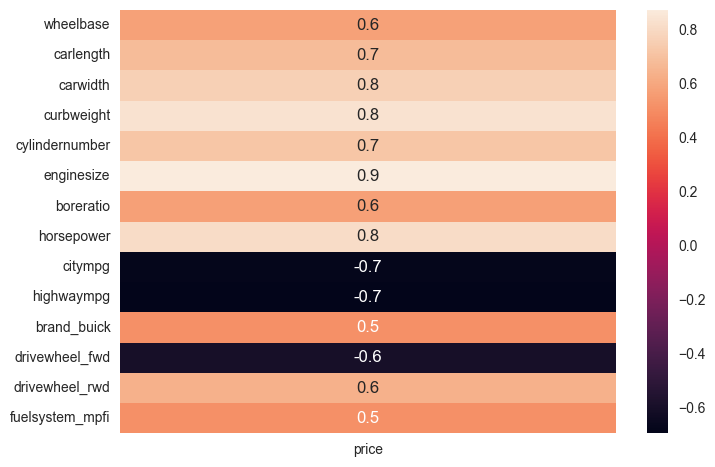

In [60]:
corr_matrix = car_df_encoded_std.corr()

#let's isolate price column and remove price row
corr_price = corr_matrix[['price']].drop(labels=['price']).query("abs(price)>0.5")
sns.heatmap(corr_price, annot = True,fmt=".1f");

From the graphical representation of correlation of each attribute to the pricel, anything which is having negtive impact on the price has to be removed and the model has to be trained again.
In the following steps we remove those features which are not as useful or effect the price of a car.

In [61]:
X = np.array(car_df_encoded_std[['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','brand_buick','drivewheel_rwd','fuelsystem_mpfi']])                          

In [62]:
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

lin_reg.fit(X_train,y_train)
print("Train Score")
print(lin_reg.score(X_train,y_train))
print('Test Score')
print(lin_reg.score(X_test,y_test))

Train Score
0.8560738016635483
Test Score
0.8217900922984007
